## Name : Karan Mehra 
#### Githuib:    https://github.com/Karanmehra7107?tab=repositories
#### Portfolio:  https://karanmehra7107.github.io/My-Portfolio/index.html
### Data Scienc Intern
#### Task Resources:    https://drive.google.com/uc?id=1BiTEaQ6MM3OXku8EhDoCa9EGhHmIuCGM&export=download





### Importing Libraries with alias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [2]:
data=pd.read_csv("Fraud.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Data cleaning including missing values, outliers and multi-collinearity.

In [3]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Text(0.5, 1.0, 'Transaction types')

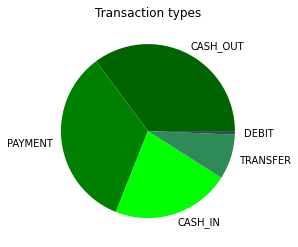

In [6]:
colors = ['#006400','#008000','#00FF00','#2E8B57','#2F4F4F']
plt.pie(data['type'].value_counts().values,labels = data['type'].value_counts().index,
        colors = colors)
plt.title('Transaction types')

<AxesSubplot:>

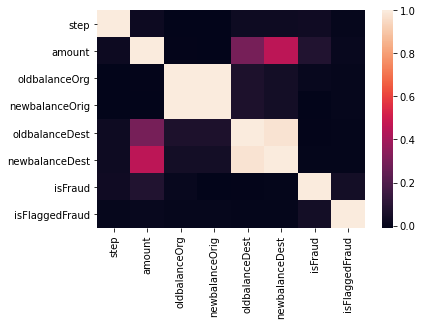

In [7]:
correlation = data.corr()
sns.heatmap(data.corr())

In [8]:
correlation['isFraud'].reset_index().sort_values('isFraud',ascending = False)

,index,isFraud
6,isFraud,1.000000
1,amount,0.076688
7,isFlaggedFraud,0.044109
0,step,0.031578
2,oldbalanceOrg,0.010154
5,newbalanceDest,0.000535
4,oldbalanceDest,-0.005885
3,newbalanceOrig,-0.008148


In [9]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
data['type'] = data['type'].map({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})

In [12]:
x = data[['type','amount','oldbalanceOrg','newbalanceOrig']]
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,2,9839.64,170136.00,160296.36
1,2,1864.28,21249.00,19384.72
2,4,181.00,181.00,0.00
3,1,181.00,181.00,0.00
4,2,11668.14,41554.00,29885.86
...,...,...,...,...
6362615,1,339682.13,339682.13,0.00
6362616,4,6311409.28,6311409.28,0.00
6362617,1,6311409.28,6311409.28,0.00
6362618,4,850002.52,850002.52,0.00


In [13]:
y = data['isFraud']
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [15]:
xtrain.shape

(5090096, 4)

In [16]:
xtest.shape

(1272524, 4)

### We have successfully processed the data and it is time for serving the data to the model. It is time consuming to find out which model works best for our data. Hence I have utlized pipeline to run our data through all the classification algorithm and select the best which gives out the maximum accuracy.

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
model = tree.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9997202410327821

In [18]:
ytest.head(1)

5518807    0
Name: isFraud, dtype: int64

In [19]:
model.predict([[3,251111.82,2679291.55,2930403.37]])

array([0], dtype=int64)

### The model has identified false positives but never let even a single false negative which is more important than FP. Since we cant miss out a fraud transactions, but we can manage false positive results by investigating them